# SciPy - CSGraph

CSGraph stands for Compressed Sparse Graph, which focuses on Fast graph algorithms based on sparse matrix representations.

## Graph Representations

To begin with, let us understand what a sparse graph is and how it helps in graph representations.

### What exactly is a sparse graph?

A graph is just a collection of nodes, which have links between them. 

Graphs can represent nearly anything − social network connections, where each node is a person and is connected to acquaintances; images, where each node is a pixel and is connected to neighboring pixels; points in a high-dimensional distribution, where each node is connected to its nearest neighbors; and practically anything else you can imagine.

One very efficient way to represent graph data is in a sparse matrix: let us call it G. 
    
The matrix G is of size N x N, and G[i, j] gives the value of the connection between node 'i' and node 'j'. 

A sparse graph contains mostly zeros − that is, most nodes have only a few connections. 

This property turns out to be true in most cases of interest.

The creation of the sparse graph submodule was motivated by several algorithms used in scikit-learn that included the following −

- ***Isomap*** − A manifold learning algorithm, which requires finding the shortest paths in a graph. (https://en.wikipedia.org/wiki/Isomap)

- ***Hierarchical clustering*** − A clustering algorithm based on a minimum spanning tree.(https://en.wikipedia.org/wiki/Hierarchical_clustering)

- ***Spectral Decomposition*** − A projection algorithm based on sparse graph laplacians.

# Graph Representations¶

https://docs.scipy.org/doc/scipy/reference/sparse.csgraph.html

This module uses graphs which are stored in a matrix format. 

A graph with N nodes can be represented by an (N x N) adjacency matrix G. If there is a connection from node i to node j, then G[i, j] = w, where w is the weight of the connection. 

For nodes i and j which are not connected, the value depends on the representation:

- for dense array representations, non-edges are represented by G[i, j] = 0, infinity, or NaN.

- for dense masked representations (of type np.ma.MaskedArray), non-edges are represented by masked values. This can be useful when graphs with zero-weight edges are desired.

- for sparse array representations, non-edges are represented by non-entries in the matrix. This sort of sparse representation also allows for edges with zero weights.

As a concrete example, imagine that you would like to represent the following undirected graph:    

In [ ]:
        G
    
       (0)
       / \
      1   2
     /     \
   (2)     (1)

This graph has three nodes, where node 0 and 1 are connected by an edge of weight 2, and nodes 0 and 2 are connected by an edge of weight 1. 

We can construct the dense, masked, and sparse representations as follows.

G[0, 0] = 0; G[0, 1] = 2, G[0, 2] = 1; 

G[1, 0] = 2; G[1, 1] = 0; G[1, 2] = 0;

G[2, 0] = 1; G[2, 1] = 0; G[2, 2] = 0;

Keep in mind that an undirected graph is represented by a symmetric matrix:
    
G[i, j] can be expressed as below:

$$
G[i, j] = \begin{bmatrix}
0 & 2 & 1 \\
2 & 0 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}
$$

In [11]:
import numpy as np

G_dense = np.array([[0, 2, 1],
                    [2, 0, 0],
                    [1, 0, 0]])

G_masked = np.ma.masked_values(G_dense, 0)
# We masked the value 0 out.
from scipy.sparse import csr_matrix

G_sparse = csr_matrix(G_dense)

print('G_sparse:')
print(G_sparse)
print()

print('G_sparse.data:')
print(G_sparse.data)

G_sparse:
  (0, 1)	2
  (0, 2)	1
  (1, 0)	2
  (2, 0)	1

G_sparse.data:
[2 1 2 1]


In [ ]:
Rewrite the sparse matrix (G_sparse) as below:

G[0,1] = 2; G[0, 2] = 1; 

G[1, 0] = 2; G[2, 0] = 1;

Redraw the graph, the 2 x 2 (G_sparse) Sparse Matrix which is identical the previous 3 x 3 (G_dense) Full matrix.

In [ ]:
       G

      (0)
      / \
     2   1
    /     \
   (1)    (2)

# Use inf for node 0

You can replace 0 with inf. 

IEEE uses inf for infinity number. 

SciPy will ignore this number.

In [12]:
from scipy.sparse.csgraph import csgraph_from_dense
G2_data = np.array([[np.inf, 2,      0     ],
                   [2,      np.inf, np.inf],
                   [0,      np.inf, np.inf]])
G2_masked = np.ma.masked_invalid(G2_data)
from scipy.sparse.csgraph import csgraph_from_dense
# G2_sparse = csr_matrix(G2_data) would give the wrong result
G2_sparse = csgraph_from_dense(G2_data, null_value=np.inf)
print('G_sparse:')
print(G_sparse)
print()

print('G_sparse.data:')
print(G_sparse.data)

G_sparse:
  (0, 1)	2
  (0, 2)	1
  (1, 0)	2
  (2, 0)	1

G_sparse.data:
[2 1 2 1]


### Note:
    
Rewrite the sparse matrix (G_sparse) as below:

G[0, 1] = 2; G[0, 2] = 1; 

G[1, 0] = 2; G[2, 0] = 1;

Redraw the graph, the 2 x 2 (G_sparse) Sparse Matrix which is identical the previous 3 x 3 (G_dense) Full matrix.

In [ ]:
       G

      (0)
      / \
     2   1
    /     \
   (1)    (2)

# Directed vs. undirected

Matrices may represent either directed or undirected graphs. 

This is specified throughout the csgraph module by a boolean keyword. 

Graphs are assumed to be directed by default. 

In a directed graph, traversal from node i to node j can be accomplished over the edge G[i, j], but not the edge G[j, i]. 

Consider the following dense graph:

In [ ]:
G_dense = np.array([[0, 1, 0],
                    [2, 0, 3],
                    [0, 4, 0]])

### Note:

G[0, 0] = 0; G[0, 1] = 1; G[0, 2] = 0;

G[1, 0] = 2; G[1, 1] = 0; G[1, 2] = 3;

G[2, 0] = 0; G[2, 1] = 4; G[2, 2] = 0;

In [ ]:
Draw the above 3 x 3 g_dense matrix as follow:

                    G
        
             --1-->   --3-->
          (0)      (1)      (2)
             <--2--   <--4--

In [19]:
import numpy as np

G_dense = np.array([[0, 1, 0],
                    [2, 0, 3],
                    [0, 4, 0]])

G_masked = np.ma.masked_values(G_dense, 0)
# We masked the value 0 out.
from scipy.sparse import csr_matrix

G_sparse = csr_matrix(G_dense)

print('G_sparse:')
print(G_sparse)
print()

print('G_sparse.data:')
print(G_sparse.data)

G_sparse:
  (0, 1)	1
  (1, 0)	2
  (1, 2)	3
  (2, 1)	4

G_sparse.data:
[1 2 3 4]


### Verify:

From the converted result:
    
  (0, 1)    1
  (1, 0)    2
  (1, 2)    3
  (2, 1)    4

Write into 3 x 3 G_dense matrix:
    
G[0, 0] = 0; G[0, 1] = 1; G[0, 2] = 0;

G[1, 0] = 2; G[1, 1] = 0; G[1, 2] = 3;

G[2, 0] = 0; G[2, 1] = 4; G[2, 2] = 0

Re-draw the above 3 x 3 g_dense matrix as follow:

                    G
        
             --1-->   --3-->
          (0)      (1)      (2)
             <--2--   <--4--

# Connected Component

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.connected_components.html
    
Reference: D. J. Pearce, “An Improved Algorithm for Finding the Strongly Connected Components of a Directed Graph”, Technical Report, 2005

    
Analyze the connected components of a sparse graph

In [29]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

graph = [
  [ 0, 1, 1, 0, 0],
  [ 0, 0, 1, 0, 0],
  [ 0, 0, 0, 0, 0],
  [ 0, 0, 0, 0, 1],
  [ 0, 0, 0, 0, 0]
]
graph = csr_matrix(graph)
print('graph:')
print(graph)
print()
#  (0, 1)    1
#  (0, 2)    1
#  (1, 2)    1
#  (3, 4)    1

n_components, labels = connected_components(csgraph=graph, directed=False, return_labels=True)
print('n_components:')
print(n_components)
print()
# The number of connected components.
# 2
print('labels:')
print(labels)
# The labels are the length-N array of labels of the connected components.
# [0 0 0 1 1]

graph:
  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (3, 4)	1

n_components:
2

labels:
[0 0 0 1 1]


In [ ]:
graph = [
  [ 0, 1, 1, 0, 0],
  [ 0, 0, 1, 0, 0],
  [ 0, 0, 0, 0, 0],
  [ 0, 0, 0, 0, 1],
  [ 0, 0, 0, 0, 0]
]

G[0, 0] = 0; G[0, 1] = 1; G[0, 2] = 1; G[0, 3] = 0; G[0, 4] = 0;

G[1, 0] = 0; G[1, 1] = 0; G[1, 2] = 1; G[1, 3] = 0; G[1, 4] = 0;

G[2, 0] = 0; G[2, 1] = 0; G[2, 2] = 0; G[2, 3] = 0; G[2, 4] = 0;

G[3, 0] = 0; G[3, 1] = 0; G[3, 2] = 0; G[3, 3] = 0; G[3, 4] = 1;

G[4, 0] = 0; G[4, 1] = 0; G[4, 2] = 0; G[4, 3] = 0; G[4, 4] = 0;


                    G
    
                   (0)              (3)
                  /   \              |
                 1     1             1
                /       \            |
              (1) - 1 - (2)         (4)
             
             

# Word Ladder with Sparse Graph

https://jakevdp.github.io/blog/2012/10/14/scipy-sparse-graph-module-word-ladders/

Word ladders is a game invented by Lewis Carroll, in which words are linked by changing a single letter at each step. 

For example −

- APE → APT → AIT → BIT → BIG → BAG → MAG → MAN

Here, we have gone from "APE" to "MAN" in seven steps, changing one letter each time. 

The question is - Can we find a shorter path between these words using the same rule? 

This problem is naturally expressed as a sparse graph problem. 

The nodes will correspond to individual words, and we will create connections between words that differ by at the most – one letter.

## Word Ladder Example:

Word Ladder with duplicated inner Loop (Dog → Log → Cog → Dog → Log):
    
- Hit → Hot → Dot → Dog → Log → Cog → Dog → Log → Lot

Word Ladder with shortest path:

- Hit → Hot → Dot → Dog → Cog → Log → Lot

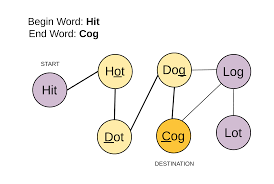

In [ ]:
## Read Obtaining a List of Words

First, we must obtain a list of valid words. 

You can download word lisr form:

https://gist.github.com/wchargin/8927565
    
Mac OS also have a word dictionary at the location (/usr/share/dict/words).

## Select three character string from word list

For simplification, 

First, We only want to look at words of length 3.

Second, we eliminate words, which start with lower case (proper nouns).

Third, we select strings contain non-alpha-numeric characters only, such as, apostrophes and hyphens. 

In [38]:
# Read and CLean the word list
word_list = open('./data/words').read().split()
print('len(word_list):')
print(len(word_list))
print()

# Select word length = 3
word_list = [word for word in word_list if len(word) == 3]
print('len(word_list1):')
print(len(word_list))
print()

# Select the first character is lower cases.
word_list = [word for word in word_list if word[0].islower()]
print('len(word_list2):')
print(len(word_list))
print()

# Select the alphabetic strings
word_list = [word for word in word_list if word.isalpha()]
print('len(word_list3):')
print(word_list)
print(len(word_list))
print()
#word_list = map(str.lower, word_list)
#print ('len(word_list4):')
#print(word_list)
#print (len(word_list))

len(word_list):
99171

len(word_list1):
845

len(word_list2):
587

len(word_list3):
['ace', 'act', 'add', 'ado', 'ads', 'adz', 'aft', 'age', 'ago', 'aha', 'aid', 'ail', 'aim', 'air', 'alb', 'ale', 'all', 'amp', 'and', 'ani', 'ant', 'any', 'ape', 'apt', 'arc', 'are', 'ark', 'arm', 'art', 'ash', 'ask', 'asp', 'ass', 'ate', 'auk', 'awe', 'awl', 'axe', 'aye', 'baa', 'bad', 'bag', 'bah', 'ban', 'bar', 'bat', 'bay', 'bed', 'bee', 'beg', 'bet', 'bib', 'bid', 'big', 'bin', 'bit', 'boa', 'bob', 'bog', 'boo', 'bop', 'bow', 'box', 'boy', 'bra', 'brr', 'bud', 'bug', 'bum', 'bun', 'bur', 'bus', 'but', 'buy', 'bye', 'cab', 'cad', 'cam', 'can', 'cap', 'car', 'cat', 'caw', 'chi', 'cob', 'cod', 'cog', 'con', 'coo', 'cop', 'cot', 'cow', 'cox', 'coy', 'cry', 'cub', 'cud', 'cue', 'cup', 'cur', 'cut', 'dab', 'dad', 'dam', 'day', 'deb', 'den', 'dew', 'did', 'die', 'dig', 'dim', 'din', 'dip', 'dis', 'doc', 'doe', 'dog', 'don', 'dos', 'dot', 'dry', 'dub', 'dud', 'due', 'dug', 'duh', 'dun', 'duo', 'dye', 'ear'

In [ ]:
## Vectorization

Now, we have a list of 586 valid three-letter words. 

Each of these words will become a node in our graph.

We will create edges connecting the nodes associated with each pair of words, which differs by only one letter.

Perform the vectorization:
    
- Convert the select words into Numpy n-dimensional array

- Convert the text into values


In [63]:
word_list = open('./data/words').read().split()
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]

import numpy as np
word_list = np.asarray(word_list)
print('word_list.dtype:')
print(word_list.dtype)
print()

print('word_list.sort():')
print()
word_list.sort()

#print('word_list:')
#print(word_list)
#print()

print('word_list.shape:')
print(word_list.shape)
print()

print('word_list.size:')
print(word_list.size)
print()

print('word_list.itemsize:')
print(word_list.itemsize)
print()

word_bytes = np.ndarray((word_list.size, word_list.itemsize),
   dtype = 'int8',
   buffer = word_list.data)

import pprint as pp
print('word_bytes.shape:')
print(word_bytes.shape)
print()
print('word_bytes:')
pp.pprint(word_bytes)
print()
print('word_bytes[:5]:')
print(word_bytes[:5])

word_list.dtype:
<U3

word_list.sort():

word_list.shape:
(586,)

word_list.size:
586

word_list.itemsize:
12

word_bytes.shape:
(586, 12)

word_bytes:
array([[ 97,   0,   0, ...,   0,   0,   0],
       [ 97,   0,   0, ...,   0,   0,   0],
       [ 97,   0,   0, ...,   0,   0,   0],
       ...,
       [122,   0,   0, ...,   0,   0,   0],
       [122,   0,   0, ...,   0,   0,   0],
       [122,   0,   0, ...,   0,   0,   0]], dtype=int8)

word_bytes[:5]:
[[ 97   0   0   0  99   0   0   0 101   0   0   0]
 [ 97   0   0   0  99   0   0   0 116   0   0   0]
 [ 97   0   0   0 100   0   0   0 100   0   0   0]
 [ 97   0   0   0 100   0   0   0 111   0   0   0]
 [ 97   0   0   0 100   0   0   0 115   0   0   0]]


## Hamming Distance

https://www.tutorialspoint.com/what-is-hamming-distance#:~:text=Hamming%20distance%20is%20a%20metric,d(a%2Cb).
    
Hamming distance is a metric for comparing two binary data strings. 

While comparing two binary strings of equal length, Hamming distance is the number of bit positions in which the two bits are different. 

The Hamming distance between two strings, a and b is denoted as d(a,b).

It is used for error detection or error correction when data is transmitted over computer networks. 

It is also using in coding theory for comparing equal length data words.

## Calculation of Hamming Distance

In order to calculate the Hamming distance between two strings, and , we perform their XOR operation, (a⊕ b), and then count the total number of 1s in the resultant string.

### Example 

Suppose there are two strings 1101 1001 and 1001 1101.

11011001 ⊕ 10011101 = 01000100. Since, this contains two 1s, the Hamming distance, d(11011001, 10011101) = 2.

## Minimum Hamming Distance

In a set of strings of equal lengths, the minimum Hamming distance is the smallest Hamming distance between all possible pairs of strings in that set.

### Example 

Suppose there are four strings 010, 011, 101 and 111.

010 ⊕ 011 = 001, d(010, 011) = 1.

010 ⊕ 101 = 111, d(010, 101) = 3.

010 ⊕ 111 = 101, d(010, 111) = 2.

011 ⊕ 101 = 110, d(011, 101) = 2.

011 ⊕ 111 = 100, d(011, 111) = 1.

101 ⊕ 111 = 010, d(011, 111) = 1.

Hence, the Minimum Hamming Distance, dmin = 1.

We will use the Hamming distance between each point to determine, which pairs of words are connected. 

## Hamming Distance between WOrds

https://en.wikipedia.org/wiki/Hamming_distance
    
The Hamming distance measures the fraction of entries between two vectors, 
which differ: any two words with a hamming distance equal to 1/N1/N, 
where NN is the number of letters, 
which are connected in the word ladder.

### Examples

The symbols may be letters, bits, or decimal digits, among other possibilities. 

For example, the Hamming distance between:
    
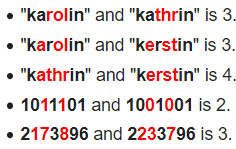

## scipy.spatial.distance.squareform

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html
    
Convert a vector-form distance vector to a square-form distance matrix, and vice-versa.

## scipy.sparse.csr_matrix

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

Compressed Sparse Row matrix
    

In [84]:
word_list = open('./data/words').read().split()
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]

import numpy as np
word_list = np.asarray(word_list)

word_list.dtype
word_list.sort()

word_bytes = np.ndarray((word_list.size, word_list.itemsize),
   dtype = 'int8',
   buffer = word_list.data)
print (word_bytes.shape)

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
hamming_dist = pdist(word_bytes, metric = 'hamming')
import pprint as pp
print('hamming_dist:')
pp.pprint(hamming_dist)
print()
print('hamming_dist[:5]:')
print(hamming_dist[:5])
print()

print('word_list.itemsize:')
print(word_list.itemsize)
print()

print('1.5 / word_list.itemsize:')
print(1.5 / word_list.itemsize)
print()
#print('hamming_dist < 1.5 / word_list.itemsize:')
#print(hamming_dist < 1.5 / word_list.itemsize)
print('hamming_dist < (1.5 / word_list.itemsize):')
print(hamming_dist < (1.5 / word_list.itemsize))
print()
print('squareform(hamming_dist < (1.5 / word_list.itemsize)):')
print(squareform(hamming_dist < (1.5 / word_list.itemsize)))
print()
# sqauretransform: Convert a vector-form distance vector to a square-form distance matrix, and vice-versa.
# csr_matrix: Convert into the CSR (Compressed Sparse Matrix)
graph = csr_matrix(squareform(hamming_dist < (1.5 / word_list.itemsize)))
#print('graph:')
#print(graph)
print('graph[:1]:')
print(graph[:1])
print()
print('graph[:2]:')
print(graph[:2])

(586, 12)
hamming_dist:
array([0.08333333, 0.16666667, 0.16666667, ..., 0.08333333, 0.16666667,
       0.16666667])

hamming_dist[:5]:
[0.08333333 0.16666667 0.16666667 0.16666667 0.16666667]

word_list.itemsize:
12

1.5 / word_list.itemsize:
0.125

hamming_dist < (1.5 / word_list.itemsize):
[ True False False ...  True False False]

squareform(hamming_dist < (1.5 / word_list.itemsize)):
[[False  True False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False  True False]
 [False False False ...  True False False]
 [False False False ... False False False]]

graph[:1]:
  (0, 1)	True
  (0, 7)	True
  (0, 15)	True
  (0, 22)	True
  (0, 25)	True
  (0, 33)	True
  (0, 35)	True
  (0, 37)	True
  (0, 38)	True
  (0, 245)	True

graph[:2]:
  (0, 1)	True
  (0, 7)	True
  (0, 15)	True
  (0, 22)	True
  (0, 25)	True
  (0, 33)	True
  (0, 35)	True
  (0, 37)	True
  (0, 38)	True
  (0, 245)	True
  (1, 0)	True
  (1, 6)	

## Find Word in Word List

When comparing the distances, we do not use equality because this can be unstable for floating point values. 

The inequality produces the desired result as long as no two entries of the word list are identical. 

Now, that our graph is set up, we will use the shortest path search to find the path between any two words in the graph.

In [89]:
word_list = open('./data/words').read().split()
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]

import numpy as np
word_list = np.asarray(word_list)

word_list.dtype
word_list.sort()

word_bytes = np.ndarray((word_list.size, word_list.itemsize),
   dtype = 'int8',
   buffer = word_list.data)
#print (word_bytes.shape)

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
hamming_dist = pdist(word_bytes, metric = 'hamming')
# print('hamming_dist:', hamming_dist)
graph = csr_matrix(squareform(hamming_dist < 1.5 / word_list.itemsize))

i1 = word_list.searchsorted('ape')
i2 = word_list.searchsorted('man')
print('word_list[i1]:')
print(word_list[i1])
print()
print('word_list[i2]:')
print(word_list[i2])

word_list[i1]:
ape

word_list[i2]:
man


## Find Distance between Words

We need to check that these match, because if the words are not in the list there will be an error in the output. 

Now, all we need is to find the shortest path between these two indices in the graph. 

We will use dijkstra’s algorithm, because it allows us to find the path for just one node.

## dijkstra’s algorithm

https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
    
Dijkstra's algorithm to find the shortest path between a and b. 

It picks the unvisited vertex with the lowest distance, calculates the distance through it to each unvisited neighbor, and updates the neighbor's distance if smaller. 

Mark visited (set to red) when done with neighbors.
    
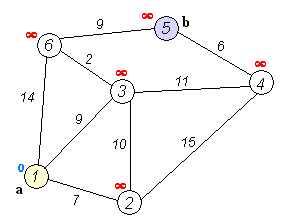    

In [93]:
word_list = open('./data/words').read().split()
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]

import numpy as np
word_list = np.asarray(word_list)

word_list.dtype
word_list.sort()

word_bytes = np.ndarray((word_list.size, word_list.itemsize),
   dtype = 'int8',
   buffer = word_list.data)
#print (word_bytes.shape)

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
hamming_dist = pdist(word_bytes, metric = 'hamming')
#print('hamming_dist:', hamming_dist)
graph = csr_matrix(squareform(hamming_dist < 1.5 / word_list.itemsize))

i1 = word_list.searchsorted('ape')
i2 = word_list.searchsorted('man')
#print (word_list[i1],word_list[i2])

from scipy.sparse.csgraph import dijkstra
distances, predecessors = dijkstra(graph, indices = i1, return_predecessors = True)
print ('distances[i2]:')
print (distances[i2])

distances[i2]:
5.0


### Shortest Path between Words by Dijkstra's Algorithm 
    
Thus, we see that the shortest path between ‘ape’ and ‘man’ contains only five steps. 

We can use the predecessors returned by the algorithm to reconstruct this path.

In [101]:
word_list = open('./data/words').read().split()
word_list = [word for word in word_list if len(word) == 3]
word_list = [word for word in word_list if word[0].islower()]
word_list = [word for word in word_list if word.isalpha()]
#print('len(word_list3):')

import numpy as np
word_list = np.asarray(word_list)

word_list.dtype
word_list.sort()

word_bytes = np.ndarray((word_list.size, word_list.itemsize),
   dtype = 'int8',
   buffer = word_list.data)
#print (word_bytes.shape)

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
hamming_dist = pdist(word_bytes, metric = 'hamming')
graph = csr_matrix(squareform(hamming_dist < 1.5 / word_list.itemsize))

i1 = word_list.searchsorted('ape')
i2 = word_list.searchsorted('man')
print (word_list[i1],word_list[i2])

from scipy.sparse.csgraph import dijkstra
distances, predecessors = dijkstra(graph, indices = i1, return_predecessors = True)
#print (distances[i2])

path = []
i = i2  
# We search from end to start: 
# start to from i2 staring word: 'man'. 
# end at i1 is the target word: 'ape' 

while i != i1:
   path.append(word_list[i])
   i = predecessors[i]
   
path.append(word_list[i1])
#print ('forward print => path[:]:', path[:])
print ('reverse print => path[::-1]:', path[::-1])

ape man
forward print => path[:]: ['man', 'mat', 'oat', 'opt', 'apt', 'ape']
reverse print => path[::-1]: ['ape', 'apt', 'opt', 'oat', 'mat', 'man']
